# <center>Plotly_Mall_Customers - Selma MOURTADI<center>

<center><blockquote><b>Visualization gives you answers to questions you didn’t know you had.</b><i> - Ben Shneiderman</i></blockquote><center>

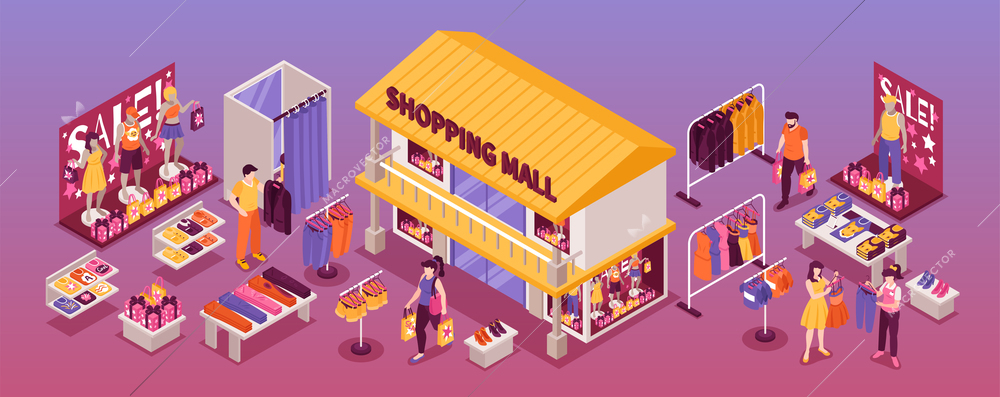

In [19]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

In [20]:
data = pd.read_csv('Mall_customers.csv')

In [21]:
fig = go.Figure(data = [go.Table(
    header = dict(values = list(data.columns),
                fill_color = 'rgb(251,166,121)',
                align ='left'),
    cells=dict(values = [data['CustomerID'], data['Gender'], data['Age'], 
                       data['Annual Income (k$)'], data['Spending Score (1-100)']],
               fill_color = 'rgb(253,237,176)',
               align = 'left'))
])

fig.show()

<b><font color='purple'>Description :</font></b>
* **CustomerID** : Each Customer has its own ID. (Numerical)
* **Gender** : Male or Female. (Categorical)
* **Age** : (Numerical)
* **Annual Income** : Income of customers in K
* **Spending Score (1-100)** : A score assigned to the customer based on some defined parameters, such as purchasing data.

In [22]:
print('Number of columns: {:}\nNumber of rows: {:}'.format(data.shape[1], data.shape[0]))

Number of columns: 5
Number of rows: 200


In [23]:
data.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

* **Age** : Age ranges from 18 to 70. 
* **Annual Income** : The  Income of the customers ranges from 15k Dollars per Year to 137k Dollars per Year.
* **Spending Score** : Minimum Spending Score equals to 1, and Maximum Spending Score equals to 99.

<b><font color='purple'>Missing values :</font></b>

In [24]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**None.**

## Interactive Histograms :

In [25]:
fig = px.histogram(data, x = "Age", color = 'Gender', title = 'Age Distribution')
fig.show()

In [26]:
fig = px.histogram(data, x ="Annual Income (k$)", color = 'Gender', title = 'Annual Income (k$) Distribution')
fig.show()

In [27]:
fig = px.histogram(data, x = "Spending Score (1-100)", color = 'Gender', title = 'Spending Score Distribution')
fig.show()

## Interactive Boxplots :

In [28]:
fig = px.box(data, y="Age", title = 'Age Boxplot')
fig.show()

In [29]:
fig = px.box(data, y="Annual Income (k$)", title = 'Annual Income (k$) Boxplot')
fig.show()

**We easily can spot an extreme value : 137k. 
Let's take a look at the characteristics of the customer(s) that owns/own this amount of annual income.**

In [30]:
data.loc[data['Annual Income (k$)'] == 137]

CustomerID Gender  Age  Annual Income (k$)  Spending Score (1-100)
198         199   Male   32                 137                      18
199         200   Male   30                 137                      83

In [31]:
fig = px.box(data, y="Spending Score (1-100)", title = 'Spending Score (1-100) Boxplot')
fig.show()

## Interactive Pie Chart  :

In [32]:
df = pd.DataFrame(data['Gender'].value_counts()).reset_index()
df.columns = ['Gender', 'Total']
df

Gender  Total
0  Female    112
1    Male     88

In [33]:
fig = px.pie(df, values = 'Total', names = 'Gender', title = 'Gender Pie Chart')
fig.show()

**56% of the customers are Female (112) and 44% are Male (88).**

## Interactive Barplots :

In [34]:
fig = px.bar(data, x = "Gender", y = "Age", color = "Gender", title = "Age By Gender")
fig.show()

In [35]:
fig = px.bar(data, x = "Gender", y = "Annual Income (k$)", color = "Gender", title = "Annual Income (k$) By Gender")
fig.show()

In [36]:
fig = px.bar(data, x = "Gender", y = "Spending Score (1-100)", color = "Gender", title = "Spending Score (1-100) By Gender")
fig.show()

In [37]:
fig = px.bar(data, x = "Age", y = "Annual Income (k$)", color = "Gender", title = "Annual Income By Age + Gender Info")
fig.show()

In [38]:
fig = px.bar(data, x = "Age", y = "Spending Score (1-100)", color = "Gender", title = "Spending Score by Age + Gender Info")
fig.show()

## Interactive Scatter Plot :

In [39]:
fig = px.scatter(data, x = "Annual Income (k$)", y = "Spending Score (1-100)", color = "Gender",
                 size = 'Age')
fig.show()

**Can't say much about the correlation between the Spending Score and the Annual Income.**

## Interactive Heatmap :

In [40]:
X = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df_2 = data.copy()
df_2 = df_2.drop(['CustomerID'], axis = 1)

In [41]:
fig = go.Figure(data = go.Heatmap(
        z = df_2.corr(),
        x = X,
        y = X,
        colorscale='RdBu'))
fig.show()

**We used Heatmap to see if we can find a correlation between Spending Score and Age, and between Annual Income and Age. Unfortunately, we got a low correlation value. Let's move now to the Clustering Algorithms!**

## KMeans :

In [42]:
from sklearn.cluster import KMeans

**We will use WCSS (Within-Cluster-Sum-of-Squares), which is basically  the sum of squares of the distances of each data point in all clusters to their respective centroids. - Also known as The Elbow Method.**

In [43]:
x = df_2.iloc[:,2:4].values
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 500, n_init = 10, random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
fig = go.Figure(data = go.Scatter(x = [1,2,3,4,5,6,7,8,9,10], y = wcss))


fig.update_layout(title = 'WCSS By Cluster Number',
                   xaxis_title = 'Clusters',
                   yaxis_title = 'WCSS')
fig.show()

**Optimal Number of Clusters according to the Elbow Method : 5 clusters.**

In [44]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y = kmeans.fit_predict(x)

**Let's use Silhouette Score this time to find the optimal number of clusters, and see if it's equals 5.**

In [54]:
from sklearn.metrics import silhouette_score

In [55]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silscore = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(x)
    silhouette_avg = silhouette_score(x, cluster_labels)
    silscore.append(silhouette_avg)
    
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.2968969162503008
For n_clusters = 3 The average silhouette_score is : 0.46761358158775435
For n_clusters = 4 The average silhouette_score is : 0.4931963109249047
For n_clusters = 5 The average silhouette_score is : 0.553931997444648
For n_clusters = 6 The average silhouette_score is : 0.5393922132561455
For n_clusters = 7 The average silhouette_score is : 0.5270287298101395
For n_clusters = 8 The average silhouette_score is : 0.4575689106804838
For n_clusters = 9 The average silhouette_score is : 0.4565077334305076
For n_clusters = 10 The average silhouette_score is : 0.449795408266166


**Highest Silhouette Score = Best Cluster. Bingo! It's 5.**

In [46]:
data_clusters = data.copy()
data_clusters['Cluster'] = y

**We Created a dataframe that will contain a column of the number of clusters assigned to each CustomerID.**

In [47]:
data_clusters.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        3  
1        1  
2        3  
3        1  
4        3

In [48]:
fig = px.scatter(data_clusters, x = "Annual Income (k$)", y = "Spending Score (1-100)", 
                 color = "Cluster",
                 size = 'Age',
                 title = "Clusters Visualization")
fig.show()

**Conclusion :**
* Low Annual Income (x <= 39) and Low Spending Score (x <= 40). - **Cluster 3 (Orange).**
* Low Annual Income (x <= 39) and High Spending Score (x >= 61). - **Cluster 1 (Purple).**
* Mid Annual Income (39 <= x <= 76) and Mid Spending Score (34 <= x <= 61). - **Cluster 0 (Blue).**
* High Annual Income (x >= 70) and Low Spending Score (x <= 39). - **Cluster 4 (Yellow).**
* High Annual Income (x >= 69) and High Spending Score (x >= 63). - **Cluster 2 (Pink).**

**Statistics about the Clusters :**

In [78]:
data_c0 = data_clusters[data_clusters['Cluster'] == 0]
data_c0.describe()

CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   81.000000  81.000000           81.000000               81.000000   
mean    86.320988  42.716049           55.296296               49.518519   
std     24.240889  16.447822            8.988109                6.530909   
min     44.000000  18.000000           39.000000               34.000000   
25%     66.000000  27.000000           48.000000               44.000000   
50%     86.000000  46.000000           54.000000               50.000000   
75%    106.000000  54.000000           62.000000               55.000000   
max    143.000000  70.000000           76.000000               61.000000   

       Cluster  
count     81.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0

In [79]:
data_c1 = data_clusters[data_clusters['Cluster'] == 1]
data_c1.describe()

CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   22.000000  22.000000           22.000000               22.000000   
mean    23.090909  25.272727           25.727273               79.363636   
std     13.147185   5.257030            7.566731               10.504174   
min      2.000000  18.000000           15.000000               61.000000   
25%     12.500000  21.250000           19.250000               73.000000   
50%     23.000000  23.500000           24.500000               77.000000   
75%     33.500000  29.750000           32.250000               85.750000   
max     46.000000  35.000000           39.000000               99.000000   

       Cluster  
count     22.0  
mean       1.0  
std        0.0  
min        1.0  
25%        1.0  
50%        1.0  
75%        1.0  
max        1.0

In [80]:
data_c2 = data_clusters[data_clusters['Cluster'] == 2]
data_c2.describe()

CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   39.000000  39.000000           39.000000               39.000000   
mean   162.000000  32.692308           86.538462               82.128205   
std     22.803509   3.728650           16.312485                9.364489   
min    124.000000  27.000000           69.000000               63.000000   
25%    143.000000  30.000000           75.500000               74.500000   
50%    162.000000  32.000000           79.000000               83.000000   
75%    181.000000  35.500000           95.000000               90.000000   
max    200.000000  40.000000          137.000000               97.000000   

       Cluster  
count     39.0  
mean       2.0  
std        0.0  
min        2.0  
25%        2.0  
50%        2.0  
75%        2.0  
max        2.0

In [81]:
data_c3 = data_clusters[data_clusters['Cluster'] == 3]
data_c3.describe()

CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count    23.00000  23.000000           23.000000               23.000000   
mean     23.00000  45.217391           26.304348               20.913043   
std      13.56466  13.228607            7.893811               13.017167   
min       1.00000  19.000000           15.000000                3.000000   
25%      12.00000  35.500000           19.500000                9.500000   
50%      23.00000  46.000000           25.000000               17.000000   
75%      34.00000  53.500000           33.000000               33.500000   
max      45.00000  67.000000           39.000000               40.000000   

       Cluster  
count     23.0  
mean       3.0  
std        0.0  
min        3.0  
25%        3.0  
50%        3.0  
75%        3.0  
max        3.0

In [82]:
data_c4 = data_clusters[data_clusters['Cluster'] == 4]
data_c4.describe()

CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   35.000000  35.000000           35.000000               35.000000   
mean   164.371429  41.114286           88.200000               17.114286   
std     21.457325  11.341676           16.399067                9.952154   
min    125.000000  19.000000           70.000000                1.000000   
25%    148.000000  34.000000           77.500000               10.000000   
50%    165.000000  42.000000           85.000000               16.000000   
75%    182.000000  47.500000           97.500000               23.500000   
max    199.000000  59.000000          137.000000               39.000000   

       Cluster  
count     35.0  
mean       4.0  
std        0.0  
min        4.0  
25%        4.0  
50%        4.0  
75%        4.0  
max        4.0

## Affinity Propagation :

In [149]:
from sklearn.cluster import AffinityPropagation

In [143]:
AP = AffinityPropagation(random_state = 0)
y = AP.fit_predict(x)

In [144]:
data_clusters = data.copy()
data_clusters['Cluster'] = y

In [145]:
fig = px.scatter(data_clusters, x = "Annual Income (k$)", y = "Spending Score (1-100)", 
                 color = "Cluster",
                 size = 'Age',
                 title = "Clusters Visualization")
fig.show()

**The number of clusters is equal to 10. Doesn't look like a good result.**

`[Other Clustering Algorithms coming soon, stay tuned hehe! :)]`